#importing the dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


Data collection and processing

In [2]:
Heart_Dataset = pd.read_csv('heart.csv')

In [3]:
#first five dataset rows
Heart_Dataset.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
Heart_Dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
# number of rows and columns
Heart_Dataset.shape

(1025, 14)

In [6]:
Heart_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
#statistical description of the dataset
Heart_Dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
#checking the distribution of the target variable
Heart_Dataset['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

1 -->  Defective Heart
0 -->  healthy Heart


# splittng the Features and Targets 

In [9]:
x = Heart_Dataset.drop('target', axis=1)
y = Heart_Dataset['target']

In [10]:
print(x)


      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [11]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [12]:
#split the dataset into Training data & Test Data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

In [13]:
print(x.shape, x_train.shape, x_test.shape)

(1025, 13) (820, 13) (205, 13)


Model Training

In [14]:
model = LogisticRegression()

In [15]:
#Training the Logistic Regression Model
model.fit(x_train, y_train)


c:\Users\galok\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
#Model Evaluation
#Accuracy score

#Accuracy on Training Data
print("Accuracy on Training Data : ", model.score(x_train, y_train))

#Accuracy on Test Data
print("Accuracy on Test Data : ", model.score(x_test, y_test))


Accuracy on Training Data :  0.848780487804878
Accuracy on Test Data :  0.8048780487804879


Building a Predective System

In [17]:
input_data = (54,1,0,122,286,0,0,116,1,3.2,1,2,2)
input_data = np.asarray(input_data)
input_data = input_data.reshape(1,-1)
prediction = model.predict(input_data)
print(prediction)

[0]


c:\Users\galok\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## 🔍 Exploratory Data Analysis (EDA)
Let's explore the dataset visually to understand patterns and relationships.

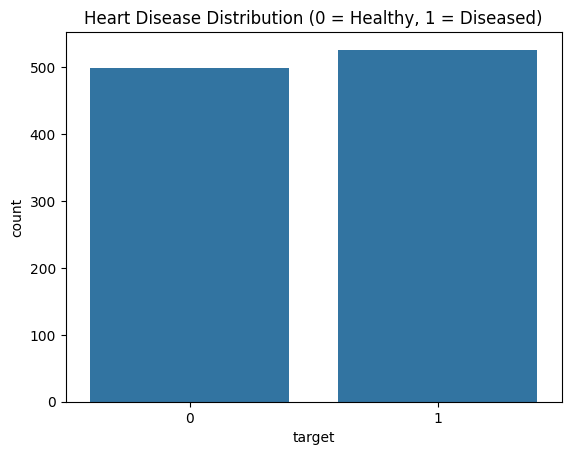

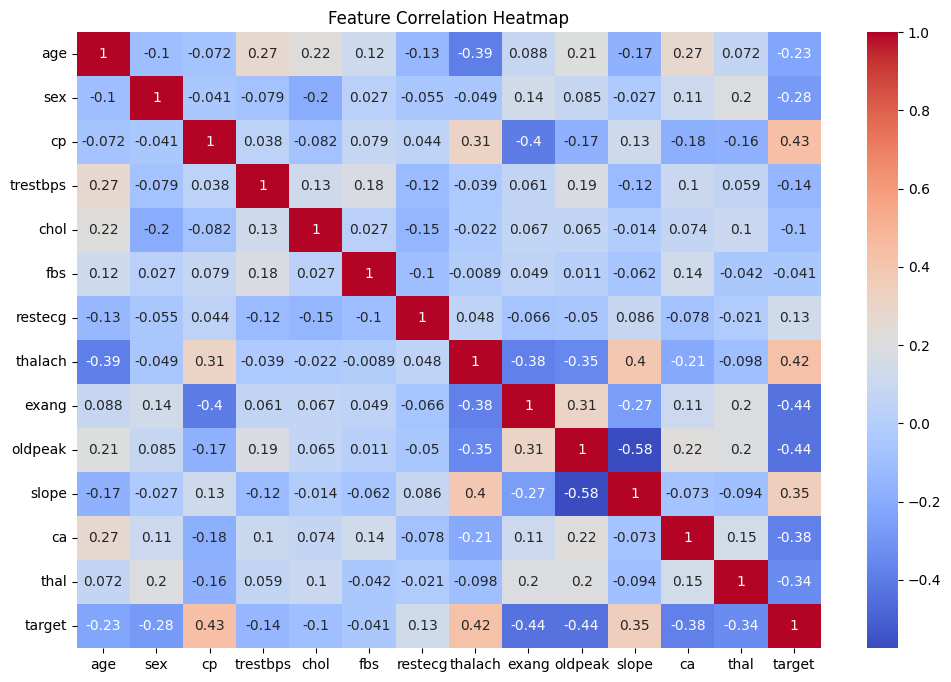

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of target variable
sns.countplot(x='target', data=Heart_Dataset)
plt.title('Heart Disease Distribution (0 = Healthy, 1 = Diseased)')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(Heart_Dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## ⚙️ Feature Engineering
We will standardize the features and also look at feature importance from Logistic Regression.

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Re-train logistic regression with scaled data
model_scaled = LogisticRegression(max_iter=1000)
model_scaled.fit(x_scaled, y)

# Feature importance (coefficients)
feature_importance = pd.DataFrame({'Feature': x.columns, 'Coefficient': model_scaled.coef_[0]})
feature_importance.sort_values(by='Coefficient', key=abs, ascending=False)

,Feature,Coefficient
2,cp,0.865354
1,sex,-0.833069
11,ca,-0.765410
9,oldpeak,-0.660445
12,thal,-0.543208
7,thalach,0.533622
8,exang,-0.465321
10,slope,0.326766
3,trestbps,-0.312564
4,chol,-0.283947


## 📊 Model Evaluation Metrics

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.72      0.78       100
           1       0.77      0.89      0.82       105

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



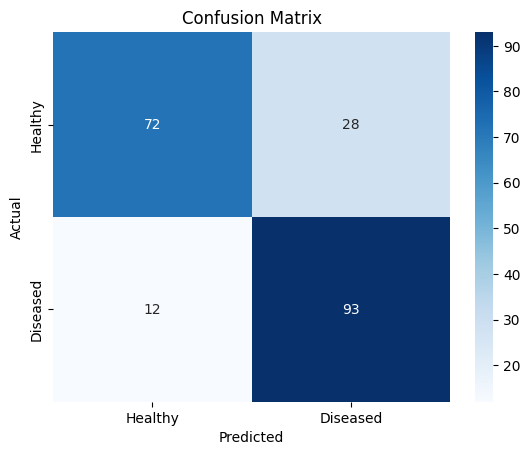

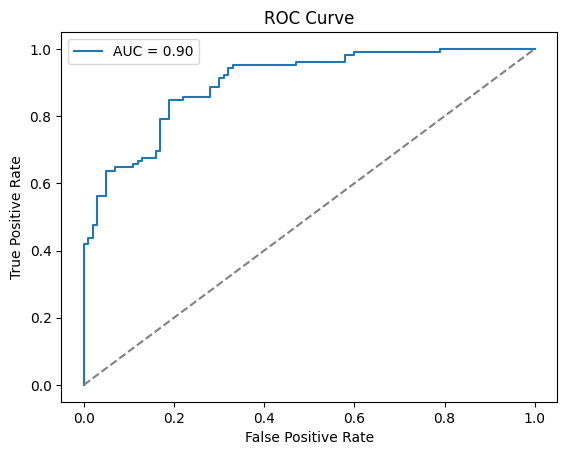

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

y_pred = model.predict(x_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy','Diseased'], yticklabels=['Healthy','Diseased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
y_prob = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## 🔄 Cross-Validation

In [21]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

c:\Users\galok\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\galok\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Cross-Validation Scores: [0.88292683 0.84878049 0.86341463 0.8195122  0.8       ]
Mean Accuracy: 0.8429268292682928


c:\Users\galok\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\galok\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

## 🤖 Model Comparison

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}

results = {}
for name, clf in models.items():
    clf.fit(x_train, y_train)
    results[name] = clf.score(x_test, y_test)

results_df = pd.DataFrame(list(results.items()), columns=['Model','Test Accuracy'])
results_df

,Model,Test Accuracy
0,Logistic Regression,0.814634
1,Random Forest,1.000000
2,SVM,0.707317


## 🧑‍⚕️ User Input Prediction Function

In [23]:
def predict_heart_disease(features):
    features = np.asarray(features).reshape(1, -1)
    features_scaled = scaler.transform(features)
    prediction = model_scaled.predict(features_scaled)[0]
    return "Diseased" if prediction == 1 else "Healthy"

# Example usage
example_patient = (54,1,0,122,286,0,0,116,1,3.2,1,2,2)
print("Prediction:", predict_heart_disease(example_patient))

Prediction: Healthy


c:\Users\galok\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# 📌 Project Summary
- Built a Logistic Regression model to predict **heart disease** based on 14 features.
- Performed **EDA** with visualizations and correlation heatmap.
- Applied **feature scaling** and extracted important features.
- Evaluated the model with **accuracy, precision, recall, F1-score, confusion matrix, ROC-AUC**.
- Performed **cross-validation** to check model stability.
- Compared Logistic Regression with **Random Forest** and **SVM**.
- Created a **user input function** for real-time predictions.

✅ This project shows a complete ML workflow: **data analysis → modeling → evaluation → comparison → deployment readiness**.
